# **¡Comunidad GenAI!**

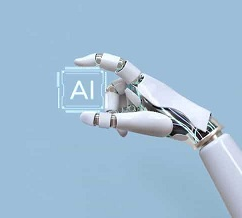



# **Predicción de emisiones de CO2 en vehÍculos, realizado con "Regresión Lineal Simple".**

**Autor: Guillermo Daniel Flores** - Data Scientist - Engineer - Analyst, DBA y Full Stack

**EMail: gdflores@teco.com.ar**

[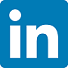](https://www.linkedin.com/in/guillermo-daniel-flores-5803b3212/)


# Rama de la IA que trabajaremos:

Inteligencia Artificial > Machine Learning > Aprendizaje Supervisado > Regresión Lineal > Regresion Lineal Simple

# Regresión Lineal Simple
Aprenderemos cómo utilizar la librería scikit-learn para implementar regresión lineal simple. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, separaremos nuestros datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos

# Importando paquetes necesarios

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Descargar Datos de Prueba (Data Set)

In [23]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2023-12-20 20:25:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2023-12-20 20:25:30 (1.93 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# EDA (Análisis Exploratorio de Datos)

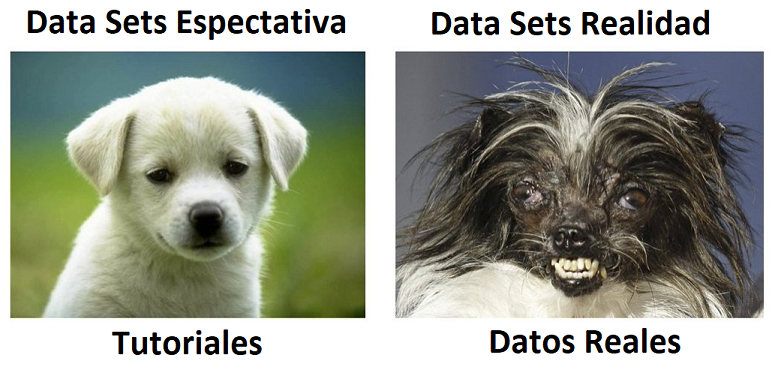


El Análisis Exploratorio de Datos es una fase crucial en el proceso de análisis de datos, donde se busca comprender y analizar el conjunto de datos antes de aplicar métodos más avanzados o modelos de machine learning. Algunos de los objetivos del EDA incluyen:

**Entender la Estructura de los Datos**: Identificar el tipo de variables presentes, la distribución de los datos, y la presencia de valores atípicos o datos faltantes.

**Identificar Patrones y Tendencias**: Buscar patrones interesantes o tendencias que puedan ser útiles en el análisis posterior.

**Detectar Anomalías o Outliers**: Identificar valores atípicos que pueden afectar la calidad de los resultados del análisis.

**Establecer Relaciones entre Variables**: Explorar relaciones entre diferentes variables para entender cómo interactúan entre sí.


Preparar los Datos para Modelos Posteriores: Realizar transformaciones y limpieza de datos según sea necesario para preparar los datos para análisis más avanzados o modelos de machine learning.

Las herramientas comunes utilizadas en el EDA incluyen gráficos, estadísticas descriptivas y técnicas visuales que ayudan a resumir y presentar la información de manera efectiva. El EDA proporciona una base sólida para la toma de decisiones informada en análisis de datos y modelado predictivo.

# Estudiar los Datos

Hemos descargado un conjunto de datos de consumo de combustible, **FuelConsumption.csv**, que contiene las clasificaciones de consumo de combustible específicas de cada modelo y las emisiones estimadas de dióxido de carbono de los vehículos ligeros nuevos para su venta al por menor en Canadá

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [24]:
df = pd.read_csv("FuelConsumption.csv")

# Visualizar Datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Seleccionemos algunas características que queremos usar para la regresión.

In [25]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


# Investigamos que relación hay entre las características

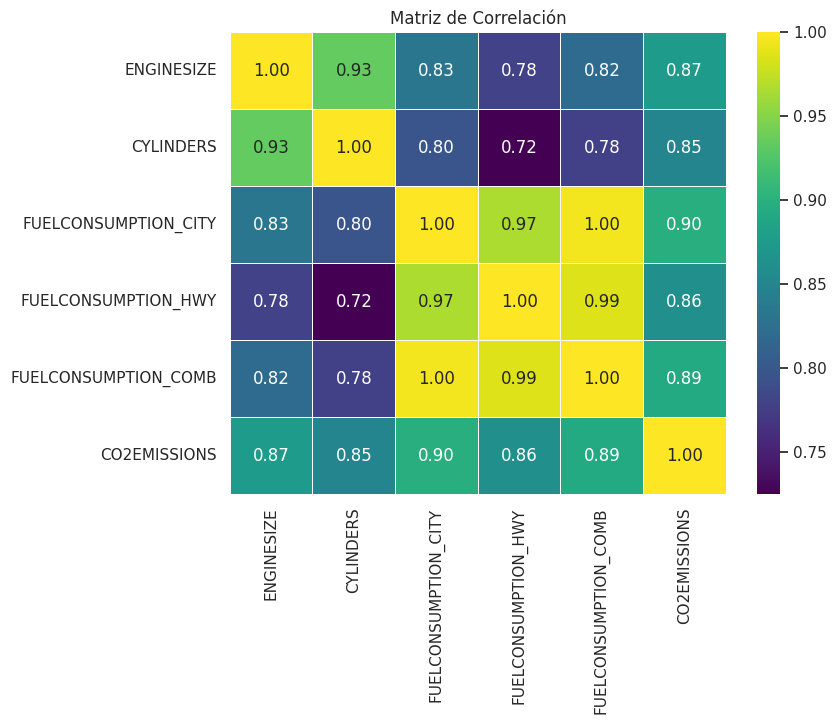

In [26]:
# Calcular la matriz de correlación
correlation_matrix = cdf.corr()

# Crear una grilla de colores
plt.figure(figsize=(8, 6))
sns.set(style="white")  # Configurar el estilo del fondo
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()


# Visualizamos la relación, entre el tamaño del motor y las emisiones

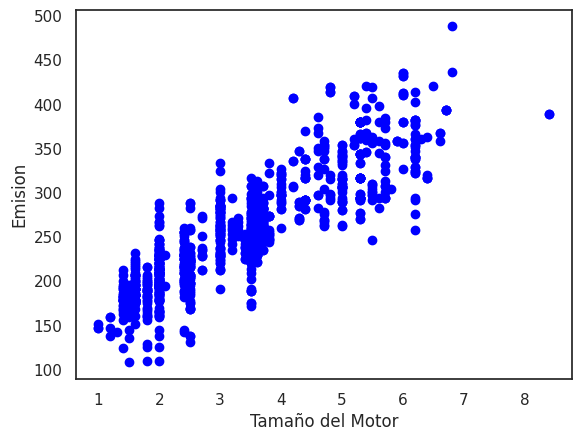

In [27]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamaño del Motor")
plt.ylabel("Emision")
plt.show()

# Prediccion

In [28]:
# Suponiendo que cdf es tu DataFrame
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

# Predecimos para un valor de ENGINESIZE, ej: 5.5

In [29]:
# Valor x a Predecir

x = np.array([[6]])
y_pred_p = model.predict(x) # Predición 1 Punto

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Graficamos, datos de entrenamiento, modelo de regresión, valor a predecir en X, como la predicción en Y

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


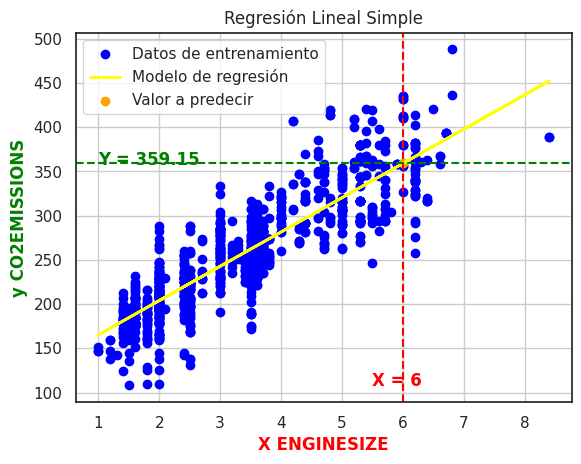

In [30]:
y_pred_a = model.predict(X) # Predición 1 Array

plt.grid(True)
plt.scatter(X, y, color='blue', label='Datos de entrenamiento')
plt.plot(X, y_pred_a, color='yellow', linewidth=2, label='Modelo de regresión')
plt.scatter(x, y_pred_p, color='orange', label='Valor a predecir')
plt.axvline(x[0], linestyle='dashed', color='red')
plt.axhline(y_pred_p, linestyle='dashed', color='green')  # Cambiado a y_pred_p en lugar de y_pred_p[0]
plt.text(x[0][0] - 0.5, np.min(y), f'X = {x[0][0]}', color='red', fontweight='bold')
plt.text(np.min(X), y_pred_p[0] - 2, f'Y = {y_pred_p[0]:.2f}', color='green', fontweight='bold')
plt.title('Regresión Lineal Simple')
plt.xlabel('X ENGINESIZE', fontweight='bold', color='red')
plt.ylabel('y CO2EMISSIONS', fontweight='bold', color='green')
plt.legend()
plt.show()


# Presición del Modelo

In [31]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de precisión
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Crear un DataFrame con las métricas
precision_df = pd.DataFrame({
    'Mean Absolute Error (MAE)': [mae],
    'R-Score (R2)': [r2]
})

precision_df

,Mean Absolute Error (MAE),R-Score (R2)
0,22.45087,0.766406


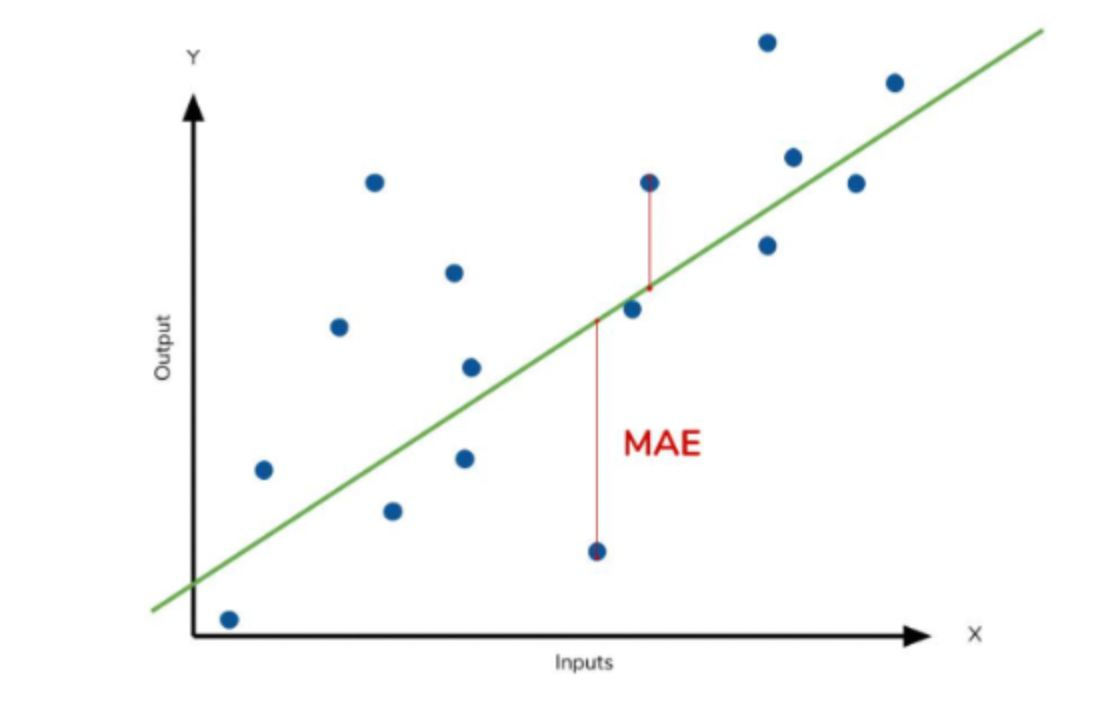

**Fin del Ejemplo**

# **MUCHAS GRACIAS**